In [1]:
import os
import pickle
import pandas as pd
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from numpy import nan
import matplotlib

In [2]:
files = [x for x in os.listdir('treatment_length_T7/') if 'results' in x]

In [3]:
existing_results = [int(f.split('_')[-1].split('.')[0]) for f in files]

In [4]:
missing_files = set(range(9261)) - set(existing_results)

In [5]:
missing_files

set()

In [6]:
with open('missing_files.txt', 'wb') as f:
    pickle.dump(missing_files, f)

In [7]:
all_results = []
for file in files:
    with open('treatment_length_T7/'+file, 'rb') as f:
        result_file = pickle.load(f)
        for r in result_file['results']:
            all_results.append(r)
            
result_df = pd.DataFrame(all_results)

In [8]:
with open('treatment_length_T7/paramgrid_newparams_a03.txt','rb') as f:
    param_grid = pickle.load(f)

In [9]:
along_m = sorted(list(set(result_df['m'])))
along_n = sorted(list(set(result_df['n'])))
along_ap = sorted(list(set(result_df['ap'])))
along_ttr = sorted(list(set(result_df['ttr'])))
along_qd = sorted(list(set(result_df['qd'])))
along_m.remove(20000)
along_ap.remove(7.8)
along_ttr.remove(5)
along_qd.remove(1-3e-6)
along_n.remove(87)
all_along_params = [('m',along_m), ('n',along_n), ('ap',along_ap), ('ttr',along_ttr), ('qd',along_qd)]
all_names_params = ['m', 'n', 'ap', 'ttr', 'qd']

In [10]:
along_ttr

[0.0,
 0.3684210526315789,
 0.7368421052631579,
 1.1052631578947367,
 1.4736842105263157,
 1.8421052631578947,
 2.2105263157894735,
 2.5789473684210527,
 2.9473684210526314,
 3.31578947368421,
 3.6842105263157894,
 4.052631578947368,
 4.421052631578947,
 4.789473684210526,
 5.157894736842105,
 5.526315789473684,
 5.894736842105263,
 6.263157894736842,
 6.63157894736842,
 7.0]

In [11]:
all_colormap_params = list(combinations(all_along_params, 2))
all_colormap_names = list(combinations(all_names_params,2))

In [12]:
dict_other_vals = {'m':20000, 'n':87, 'ap': 7.8, 'qd':1-3e-6, 'ttr':5}

In [13]:
all_matrices_for_cmap = []

for comb in all_colormap_params:
    params_axes = (comb[0][0], comb[1][0])
    print(params_axes)
    other_params = set(all_names_params)-set(params_axes)

    colormap_params = np.zeros((len(comb[0][1]), len(comb[1][1])))
    
    for xind in range(len(comb[0][1])):
        for yind in range(len(comb[0][1])):
            df_axes = result_df.copy()
            for p in other_params:
                df_axes = df_axes[df_axes[p] == dict_other_vals[p]]
            df_axes = df_axes[(df_axes[params_axes[0]] == comb[0][1][xind])&(df_axes[params_axes[1]] == comb[1][1][yind])]
            colormap_params[xind, yind] = list(df_axes['Y_treatment_after'])[0]/np.max([list(df_axes['Y_control_after'])[0],1e-300])
            
    all_matrices_for_cmap.append(colormap_params)

('m', 'n')
('m', 'ap')
('m', 'ttr')
('m', 'qd')
('n', 'ap')
('n', 'ttr')
('n', 'qd')
('ap', 'ttr')
('ap', 'qd')
('ttr', 'qd')


In [14]:
indices_colormaps = []
for i in range(5):
    for j in range(2):
        indices_colormaps.append((i,j))
indices_colormaps = dict(zip(range(10), indices_colormaps))

In [15]:
def calculate_ticks(ticklabels, truerange, tickrange):
    tick_pos = []
    for l in ticklabels:
        NewValue = (((l - truerange[0]) * (tickrange[1] - tickrange[0])) / (truerange[1] - truerange[0])) + tickrange[0]
        tick_pos.append(NewValue)
    return(np.array(tick_pos))

def calculate_ticks_log(ticklabels, truerange, tickrange):
    tick_labels = np.log(ticklabels)
    true_range = np.log(truerange)
    tick_pos = []
    for l in ticklabels:
        NewValue = (((l - truerange[0]) * (tickrange[1] - tickrange[0])) / (truerange[1] - truerange[0])) + tickrange[0]
        tick_pos.append(NewValue)
    return(np.array(tick_pos))

In [16]:
param_ticks = {'m':[1500,5000,10000,15000,20000,25000,29900],
               'n':[1,200,400,600,800,1000],
               'ap':[7.7,8.0,8.3,8.6,8.8],
               'qd':[1-1e-6,1-3e-6,1-5e-6,1-7.5e-6,1-1e-5], 
               'ttr':[0,3,5,7]}
param_ranges = {'m':[1500,29900],
                'n':[1,1000],
                'ap':[7.7,8.8],
                'qd':[1e-6,1e-5],
                'ttr':[0,7]}

In [17]:
all_xticks, all_yticks = [],[]
all_xticklabels, all_yticklabels = [],[]

for i in range(10):
    
    x_param, y_param = all_colormap_names[i]

    if y_param == 'qd':
        ticks_y = calculate_ticks_log(1-np.array(param_ticks[y_param]), param_ranges[y_param], [0,19])
    else:
        ticks_y = calculate_ticks(np.array(param_ticks[y_param]), param_ranges[y_param], [0,19])
        
    if y_param == 'qd':
        labels_y = list(["{:.1e}".format(1-x) for x in np.array(param_ticks[y_param])])
    elif y_param == 'ap':
        labels_y = [np.round(x,2) for x in param_ticks[y_param]]
    else:
        labels_y = [int(np.round(x)) for x in param_ticks[y_param]]
        
    if x_param == 'qd': 
        ticks_x = 19-np.array(calculate_ticks_log(1-np.array(param_ticks[x_param]), param_ranges[x_param], [0,19])[::-1])
    else:
        ticks_x = 19-np.array(calculate_ticks(np.array(param_ticks[x_param]), param_ranges[x_param], [0,19])[::-1])
            

    if x_param == 'qd':
        labels_x = list(["{:.1e}".format(1-x) for x in np.array(param_ticks[x_param])])
    elif x_param == 'ap':
        labels_x = [np.round(x,2) for x in param_ticks[x_param]]
    else:
        labels_x = [int(np.round(x)) for x in param_ticks[x_param]]
    
    
    all_xticks.append(ticks_x)
    all_yticks.append(ticks_y)
    all_xticklabels.append(labels_x)
    all_yticklabels.append(labels_y)

In [18]:
params_description = {'m':'Number of lethal positions $m$',
                      'n':'Number of gain-of-function positions $n$',
                      'ap': 'Clearance rate in clearance phase $a_1$ (per day)',
                      'qd': 'Viral mutation rate under treatment $u_1$ (per bp)',
                      'ttr': 'Time of start of treatment'}

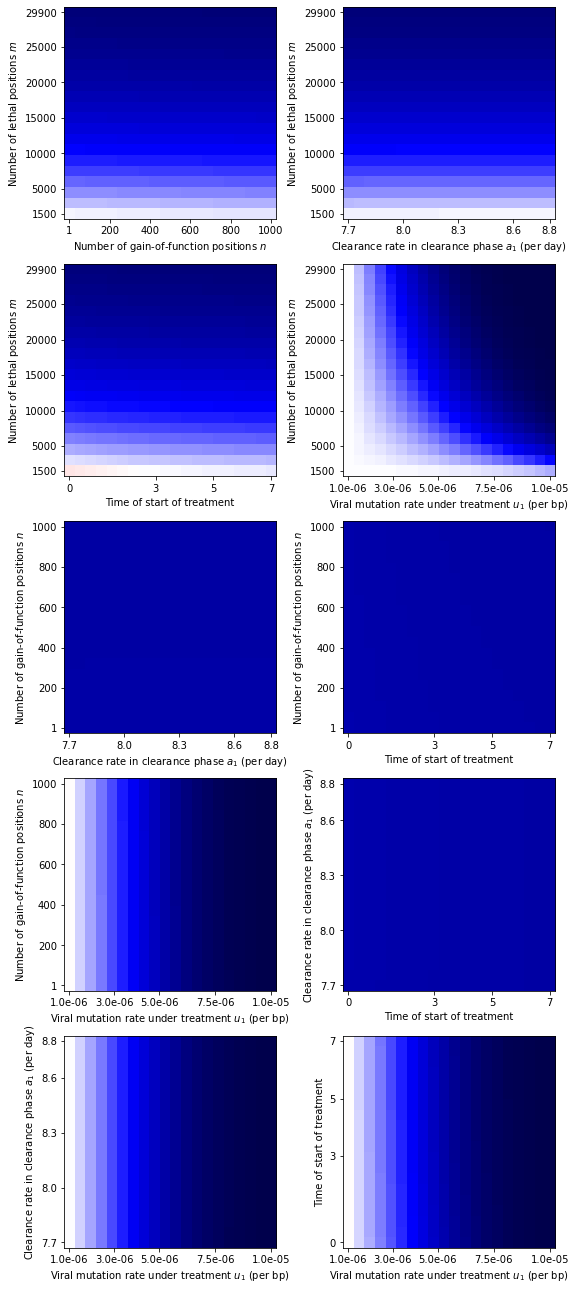

In [19]:
fig, ax = plt.subplots(5,2,figsize=(8,18))

for i in range(10):
    matrix_to_plot = all_matrices_for_cmap[i][::-1]
    #matrix_to_plot = np.ma.masked_where(matrix_to_plot == 0.0, matrix_to_plot)
    cmap = matplotlib.cm.get_cmap("seismic")
    #cmap.set_bad(color='grey')
    im = ax[indices_colormaps[i]].imshow(matrix_to_plot, cmap = cmap, interpolation = 'none', vmin = 0., vmax = 2)
    if all_colormap_params[i][1][0] in ['qd']:
        matrix_to_plot = np.flip(all_matrices_for_cmap[i][::-1],1)
        #matrix_to_plot = np.ma.masked_where(matrix_to_plot == 0.0, matrix_to_plot)
        cmap = matplotlib.cm.get_cmap("seismic")
        #cmap.set_bad(color='grey')
        im = ax[indices_colormaps[i]].imshow(matrix_to_plot, cmap = cmap, interpolation = None, vmin = 0., vmax = 2)

    ax[indices_colormaps[i]].set_xticks(all_yticks[i])
    ax[indices_colormaps[i]].set_xticklabels(all_yticklabels[i])
    
    ax[indices_colormaps[i]].set_yticks(all_xticks[i])
    ax[indices_colormaps[i]].set_yticklabels(all_xticklabels[i][::-1])    
    
    
    ax[indices_colormaps[i]].set_ylabel(params_description[all_colormap_params[i][0][0]])
    ax[indices_colormaps[i]].set_xlabel(params_description[all_colormap_params[i][1][0]])
    
    
plt.tight_layout(pad=1.0)
plt.savefig('colormaps_all_params_aftertreatT7_JULY19.jpg', dpi = 600)